In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot  as plt 
import seaborn as sns 
import scipy as py 


import tensorflow as tf  
from tensorflow import keras 
from keras import Sequential  
from keras.layers import Dense

import sweetviz as sv
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



from tensorflow.keras.layers import Dropout 
from tensorflow.keras.callbacks import EarlyStopping
from mlxtend.plotting import plot_decision_regions
from keras.optimizers import Adam

In [2]:
california = fetch_california_housing()

In [3]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df_features = pd.DataFrame(california.data, columns=california.feature_names)

In [5]:
df_target = pd.DataFrame(california.target, columns=['Target'])

In [6]:
df_target

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
df_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
df_california = pd.concat([df_features, df_target], axis=1)

In [9]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
# Generate the report
report = sv.analyze(df_california)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
df_california.shape

(20640, 9)

In [12]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
is_null = df_california.isnull().sum()
print(f"the null values in the given dataframe :  \n{is_null}")

the null values in the given dataframe :  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [14]:
no_values = df_california.duplicated().sum()
print(f"Here duplicate values {no_values}")

Here duplicate values 0


In [87]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [88]:
df_california.describe().corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,0.999999,0.999982,0.999999,0.393197,0.998242,0.999999,0.999982,1.000000
HouseAge,0.999999,1.000000,0.999986,0.999999,0.394074,0.998294,0.999998,0.999977,0.999998
AveRooms,0.999982,0.999986,1.000000,0.999987,0.398735,0.998581,0.999981,0.999956,0.999979
AveBedrms,0.999999,0.999999,0.999987,1.000000,0.394121,0.998301,0.999998,0.999981,0.999999
Population,0.393197,0.394074,0.398735,0.394121,1.000000,0.446959,0.393213,0.392050,0.392813
AveOccup,0.998242,0.998294,0.998581,0.998301,0.446959,1.000000,0.998241,0.998151,0.998217
Latitude,0.999999,0.999998,0.999981,0.999998,0.393213,0.998241,1.000000,0.999972,0.999999
Longitude,0.999982,0.999977,0.999956,0.999981,0.392050,0.998151,0.999972,1.000000,0.999983
Target,1.000000,0.999998,0.999979,0.999999,0.392813,0.998217,0.999999,0.999983,1.000000


In [89]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [90]:
x = df_california.drop(columns=['Target'])
y = df_california['Target']

In [91]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [92]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [94]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15961,3.1908,52.0,5.000000,1.014184,879.0,3.117021,37.71,-122.43
1771,3.6094,42.0,4.900990,0.957096,971.0,3.204620,37.95,-122.35
16414,2.6250,16.0,8.333333,1.666667,20.0,3.333333,37.90,-121.24
5056,1.5143,34.0,3.805981,1.149526,3538.0,2.580598,34.02,-118.35
8589,7.3356,38.0,5.894904,1.057325,750.0,2.388535,33.89,-118.39


In [95]:
x_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13


In [96]:
y_test

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
2319     0.682
5341     2.250
16888    3.500
6823     2.273
11878    1.417
Name: Target, Length: 4128, dtype: float64

In [97]:
y_train

15961    2.55600
1771     1.14600
16414    1.37500
5056     1.18800
8589     4.22700
          ...   
10955    2.05300
17289    5.00001
5192     1.04800
12172    1.40700
235      1.26000
Name: Target, Length: 16512, dtype: float64

In [105]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [123]:
# now using the Sequential model uisng the keras lib 
model = Sequential()
# here we creating the nn with diff layer
model.add(Dense(16,input_dim=8,activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(50,activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(50,activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(1,activation = "linear"))

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,595 (14.04 KB)

 Trainable params: 3,595 (14.04 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
adam = Adam(learning_rate=0.01)
model.compile(loss = 'mse',optimizer = adam, metrics = ['mse'])

In [127]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [128]:
history = model.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=100, callbacks=callback)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7796 - mse: 0.7796 - val_loss: 0.4757 - val_mse: 0.4757
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4146 - mse: 0.4146 - val_loss: 0.3540 - val_mse: 0.3540
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3543 - mse: 0.3543 - val_loss: 0.3305 - val_mse: 0.3305
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3472 - mse: 0.3472 - val_loss: 0.3375 - val_mse: 0.3375
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3259 - mse: 0.3259 - val_loss: 0.3328 - val_mse: 0.3328
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3218 - mse: 0.3218 - val_loss: 0.3129 - val_mse: 0.3129
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3268 - mse: 0.3268 - val_loss: 0.3250 - val_mse: 0.3250
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3060 - mse: 0.3060 - val_loss: 0.3002 - val_mse: 0.3002
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

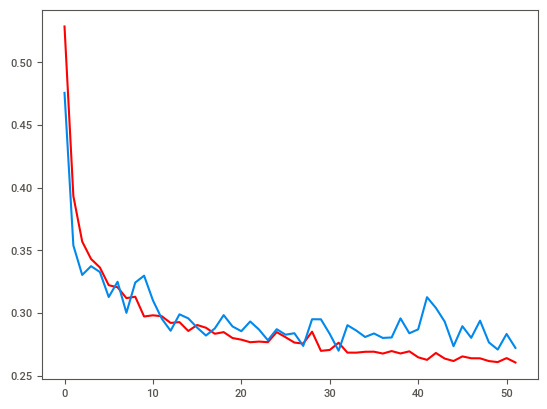

In [129]:
plt.plot(history.history['loss'],label = 'train',color ='r')
plt.plot(history.history['val_loss'],label = 'test')
# plt.lengend()
plt.show() #

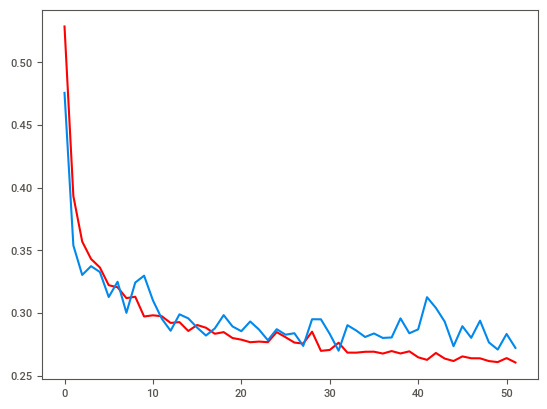

In [130]:
# here with ploting we chek the accuaray of the model 
plt.plot(history.history['loss'],color = 'r')
plt.plot(history.history['val_loss'])
plt.show()

In [131]:
# now predict 
y_pred = model.predict(x_test_scaler)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step


Lower MSE: Indicates that the model's predictions are closer to the actual values, which generally means better performance.
Good Range: The acceptable MSE value is context-dependent. In general, lower values are better. A good MSE should be small 
relative to the range of your target variable

In [134]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.272305617605767
Root Mean Squared Error (RMSE): 0.5218291076643454
Mean Absolute Error (MAE): 0.3493278576894
R-squared (R²): 0.792401068481698


In [132]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.272305617605767


In [133]:
# evaluate the model 
_ , train_mse = model.evaluate(x_train_scaler,y_train,verbose=0)
_ ,test_mse = model.evaluate(x_test_scaler,y_test,verbose=0)
print('Train : {} , Test : {}' . format(train_mse,test_mse))
# here loss on the given data 

Train : 0.24399423599243164 , Test : 0.27230557799339294
